# source ; https://www.justintodata.com/how-to-use-python-seaborn-for-exploratory-data-analysis/

This is a tutorial of using the __seaborn__ library in __Python__ for __Exploratory Data Analysis (EDA)__.

In this guide, you'll discover 

    - How to use the 'seaborn' Python package to produce useful and beautiful visualizations, including histograms, bar plots, scatter plots, boxplots, and heatmaps.
    
    - How to 'explore univariate, multivariate numerical and categorical variables' with different plots.
    
    - How to 'discover the relationships among multiple variables'.
    
    - Lots more
    

It is importatnt to explore the data before further analysis or modeling.

## What is seaborn?

'Seaborn' ; statistical data visualization is a popular Python library for performing EDA.

It is based on 'matplotlib' and provides a high-level interface for drawing attractive and informative statistical graphics.



In [2]:
import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns

df = pd.read_pickle('sydney.pkl')

### feature manual

    - views ; the number of views of the video
    
    - length ; the length of the video/workout in minutes
    
    - calories ; the number of calories burned during the workout in the video
    
    - days_since_posted ; the number of days since the video was posted unitl now
    
    - date ; the date when the video / workout was posted Sydney posts one video/workout almost every day
    
    - workout_type ; the type of workout the video was focusing on

## Univariate Analysis ; Numerical Variable

In [3]:
df_numeric = df.select_dtypes(include='number') ## good techniuqe

df_numeric

,length,views,calories,days_since_posted,num_body_areas,num_workout_types,num_other_keywords
0,31.0,197591,500.0,711.0,1,2,1
1,31.0,75863,NaN,706.0,1,3,1
2,32.0,60328,350.0,704.0,1,2,1
3,31.0,59741,430.0,701.0,1,1,0
4,31.0,18515,285.0,700.0,1,2,1
...,...,...,...,...,...,...,...
724,43.0,23454,350.0,4.0,1,2,1
725,45.0,23036,490.0,3.0,1,2,1
726,34.0,21364,360.0,2.0,1,2,2
727,22.0,6683,NaN,1.0,1,1,0


## Histogram; Single Variable

A 'histogram' is an approximate representation of the distribution of numerical data.

To construct a histogram, the first step is to 'bin' the range of values -- that is , divide the entire range of values into a series of intervals - and then count how many values fall into each interval.

Seaborn's function 'distplot' has options for;

    - bins ; the bins setting
        it's useful to plot the variable with different bins settings to discover patterns. If we don't set this value, the library will find a useful default for us.
    
    - kde ; whether to plot a Gaussian 'kernel density estimate'
        this helps to estimate the shape of the probability density function of a continuous random variable.
        
    - rug ; whether to draw a 'rug plot' on the support axis
        this draws a small vertical tick at each observation. It helps to know the exact position of the values for the variable.

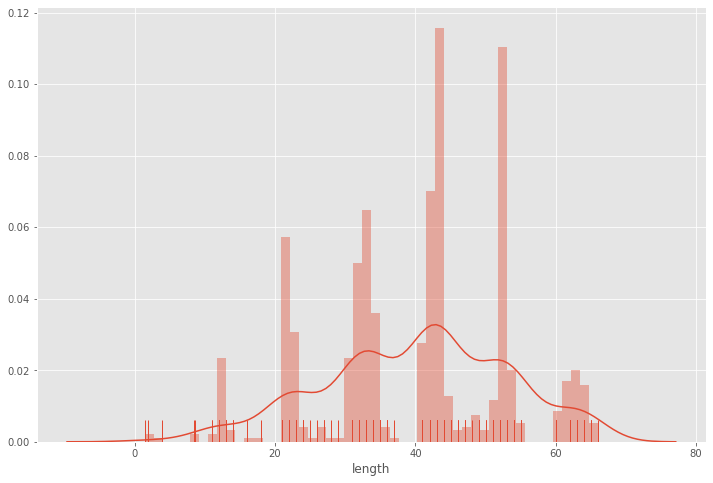

In [10]:
sns.distplot(df_numeric['length'], bins=50, kde=True, rug=True)

## Histogram ; Multiple Variables
Often, we want to visualize multiple numeric variables and look at them together.

We build the function plot_multiple_histograms below to plot histograms for a specific group of variables.

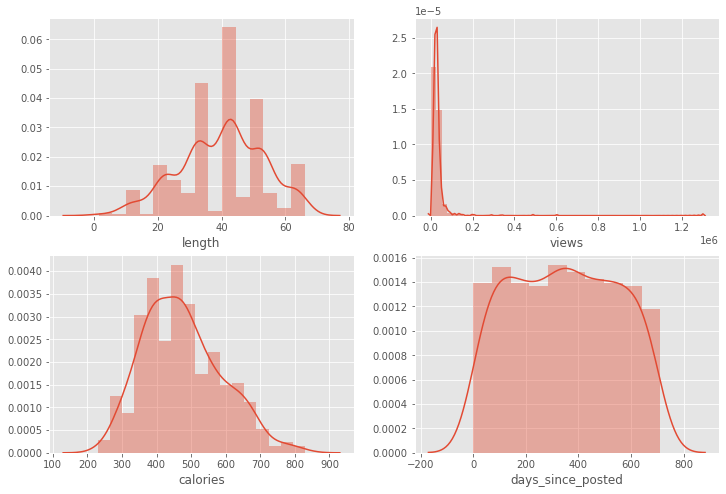

In [15]:
# this plots multiple seaborn histograms on differnet subplots.

def plot_multiple_histograms(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots)) ## math.ceil? 올림
    num_rows = math.ceil(num_plots/num_cols)
    
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols) ## math.ceil 이랑 반대 즉, 내림
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df[col], kde=True, ax=axs)
            else:
                sns.distplot(df[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df[col], kde=True, ax=axs[i, j])
    
plot_multiple_histograms(df, ['length', 'views', 'calories', 'days_since_posted'])

## Univariate Analysis ; Categorical Variables

### Bar Chart ; Single Variable
The 'Bar chart' is the categorical variables' version of the histogram.

A 'bar chart' or 'bar plot' is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

A bar graph shows comparisons among discrete categories

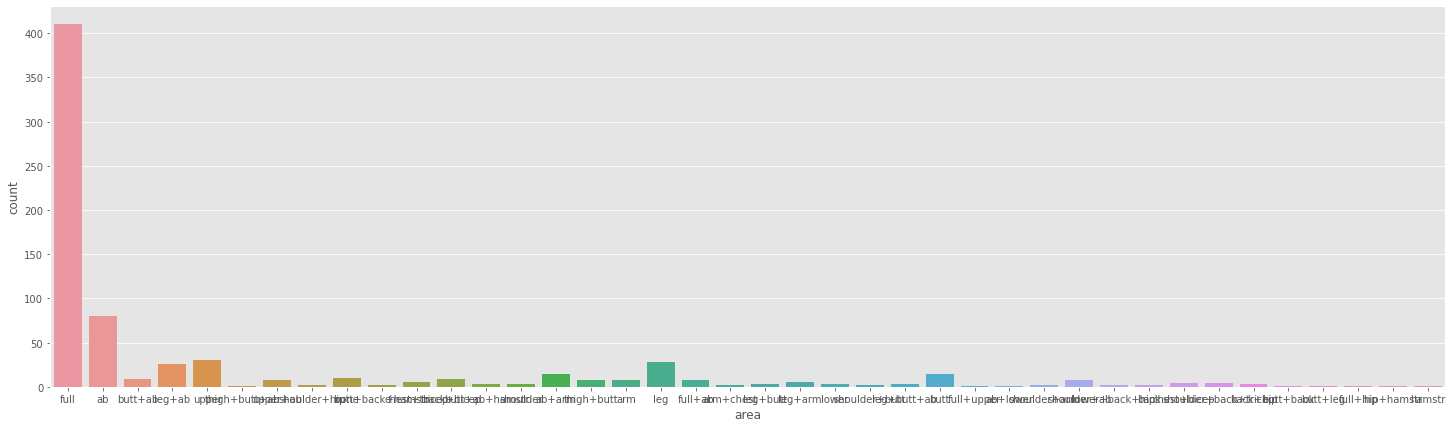

In [28]:
# selsect non-numeric variables
df_non_numeric = df.select_dtypes(exclude='number')

plt.figure(figsize=(25,7))
sns.countplot(x='area', data=df_non_numeric)

There are many areas that the videos targeted. It is hard to read without zooming in.

## Bar Chart; Multiple Variables
Also, we  create a function _plot_multiple_countplots_ to plot the bar charts of multiple variables at once.

The is_{}_area are indicator variables for different body areas. For example, is_butt_area == True when the workout focuses on the butt, otherwise it is False.

The is_{}_workout are indicator variabels for different workout types. For example, is_Strength_workout == True when the workout focuses on strength, otherwise it is False.

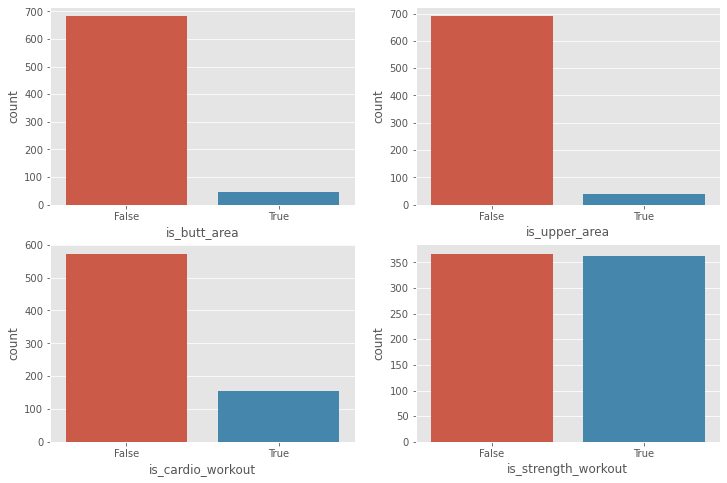

In [30]:
def plot_multiple_countplots(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
    
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot(x=df[col], ax=axs)
            else:
                sns.countplot(x=df[col], ax=axs[j])
        else:
            sns.countplot(x=df[col], ax=axs[i, j])
            
plot_multiple_countplots(df_non_numeric, ['is_butt_area', 'is_upper_area', 'is_cardio_workout', 'is_strength_workout'])

## Multivariate Analysis
AFter exploring the variables one-by-one , let's look at multiple variables together.

Different plots can be used to explore relations among different combinations of variables.

### Scatter Plot ; Two Numerical Variables

let's see how we can discover the relationship between two numerical variables.

A 'scatter plot' uses Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size),
one additional variable can be displayed.

The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other varaible determining the position on the vertical axis.

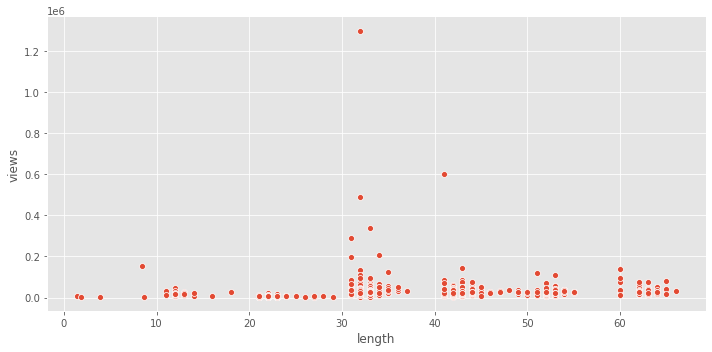

In [31]:
sns.relplot(x='length', y='views', data=df, aspect=2.0)

### Bar Chart ; Two Categorical Variables
We want to know the relationship between two categorical variables

Let's visualize the most common 6 areas (area2) and the most common 4 workout types(workout_type2) within the videos.

In [39]:
top6 = list(df['area'].value_counts().index[:5])
df['area2'] = df['area']

msk = df['area2'].isin(top6)
df.loc[~msk, 'area2'] = 'Other'

top4 = list(df['workout_type'].value_counts().index[:3])
df['workout_type2'] = df['workout_type']

msk = df['workout_type2'].isin(top4)
df.loc[~msk, 'workout_type2'] = 'Other'

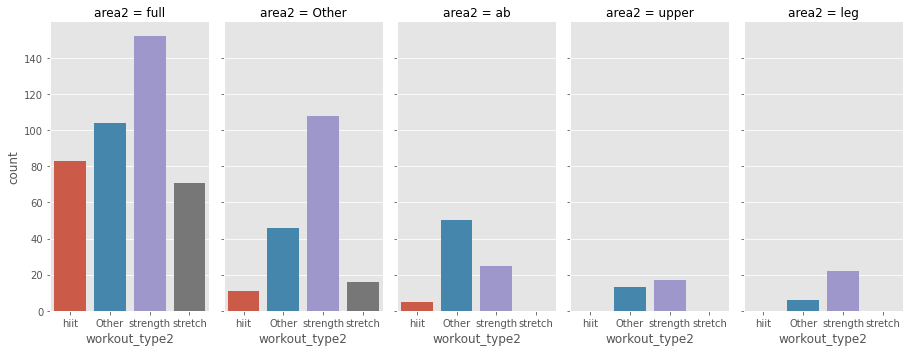

In [40]:
order = df['area2'].value_counts().index # order the columns from highest count to lowest.
sns.catplot(x="workout_type2",
            col='area2',
            col_order=order,
            kind="count", data=df,
            aspect=0.5)

## Boxplot; Numerical and Categorical Variables
'Box plots' are useful visualizations when comparing groups of categories together.

A 'box plot(box-and-whisker plot)' is a standardized way of displaying the dataset based on a five-number summary;

the minimum, the maximum, the sample median, the first and third quartiles.

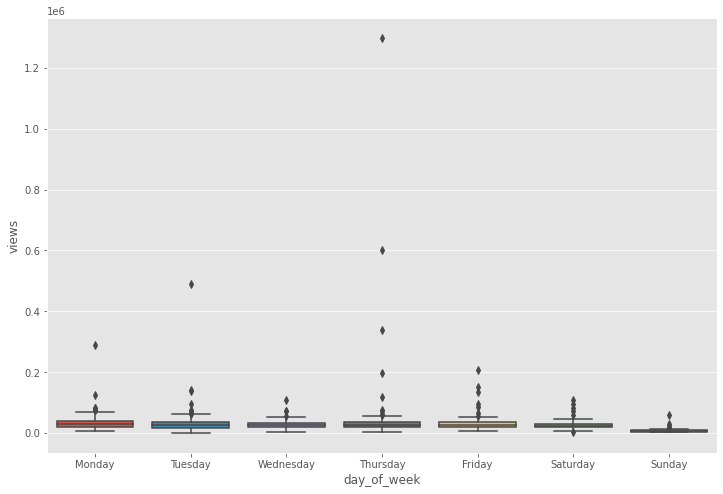

In [42]:
to_replace = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week_num'] = df['date'].dt.dayofweek
df['day_of_week'] = df['day_of_week_num'].replace(to_replace=to_replace)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x="day_of_week", y="views", data=df, order=order)

This is interesting but hard to see due to outliers. Let's remove them.

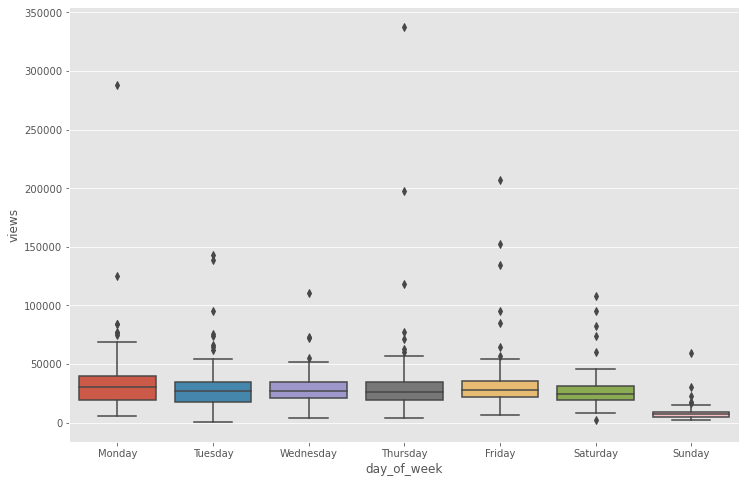

In [43]:
msk = df['views'] < 400000
sns.boxplot(x='day_of_week', y='views', data=df[msk], order=order)

We can see that Monday videos tend to have more views than other days. While Sunday videos get the least views.

## Swarmplot; Numerical and Categorical Variables

A 'swarm plot' is a categorical scatterplot where the points are adjusted (only along the categorical axis) so that they don't overlap

A swarm plot is a good complement to a box plot when we want to show all observations along with some represenbtation of the underlying distribution.

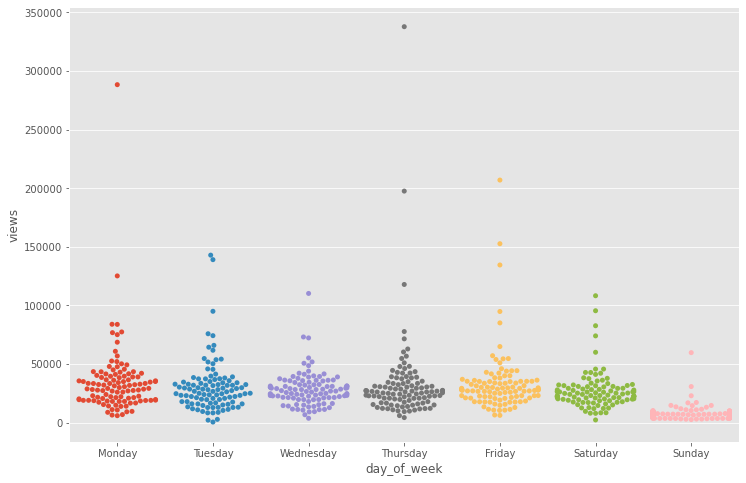

In [46]:
sns.swarmplot(x='day_of_week', y='views', data=df[msk], order=order)
#sns.swarmplot(x='day_of_week', y='views', data=df[msk], )

## Boxplot Group; Numerical and Categorical Variables
Are the views on certain days of the week higher for certain workout types?

To answer this question, two categorical variables ( workout_type, day_of_week ) and one numerical variable ( views ) are involved.

WE can use a panel boxplot to visualize the three variables together.

### The catplot is useful to show the relationship between a numerical and one or more categorical variables using one of several visual represetntations.

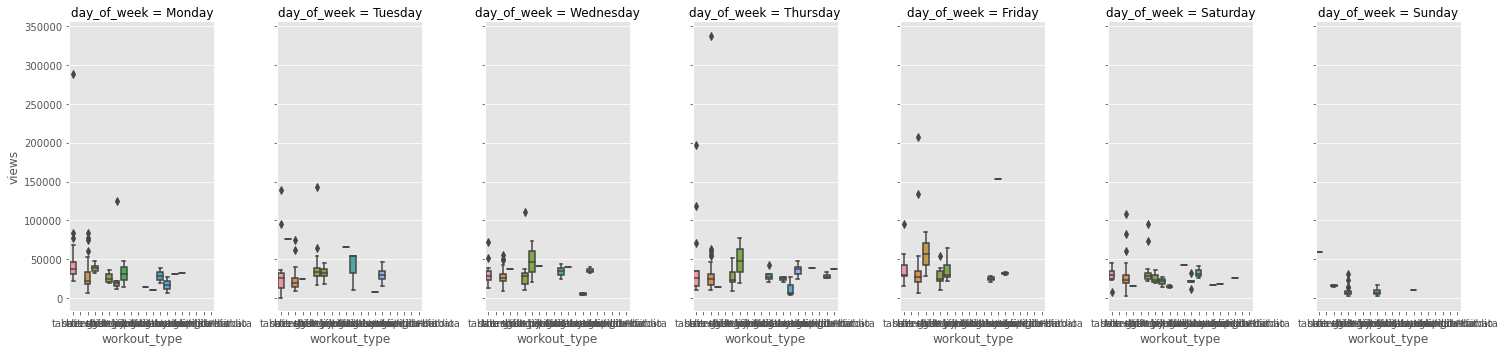

In [47]:
sns.catplot(x='workout_type', y='views',
           col='day_of_week', aspect=.6,
           kind='box', data=df[msk], col_order=order);

That's quite messy with too many categories of workout_type.

Based on the distribution of workout_tpye, we group the categories other than 'strength', 'hiit', 'stretch', 'cardio' together as 'Other'.

In [48]:
df['workout_type'].value_counts() # nqunique....?

strength                324
hiit                     99
stretch                  87
cardio                   82
hiit+cardio              28
tabata+cardio            20
strength+hiit            16
tabata                   14
yoga                     13
none                     11
strength+cardio          10
pilat+cardio              8
pilat                     6
cardio+hiit               4
tabata+hiit+cardio        2
yoga+pilat                1
strength+hiit+cardio      1
tabata+hiit               1
tabata+pilat+cardio       1
strength+tabata           1
Name: workout_type, dtype: int64

In [50]:
top4 = list(df['workout_type'].value_counts().index[:3])
df['workout_type2'] = df['workout_type']

msk = df['workout_type2'].isin(top4)
df.loc[~msk, 'workout_type2'] = 'Other'

Also, we remove the outliers to make the plot even more clear.

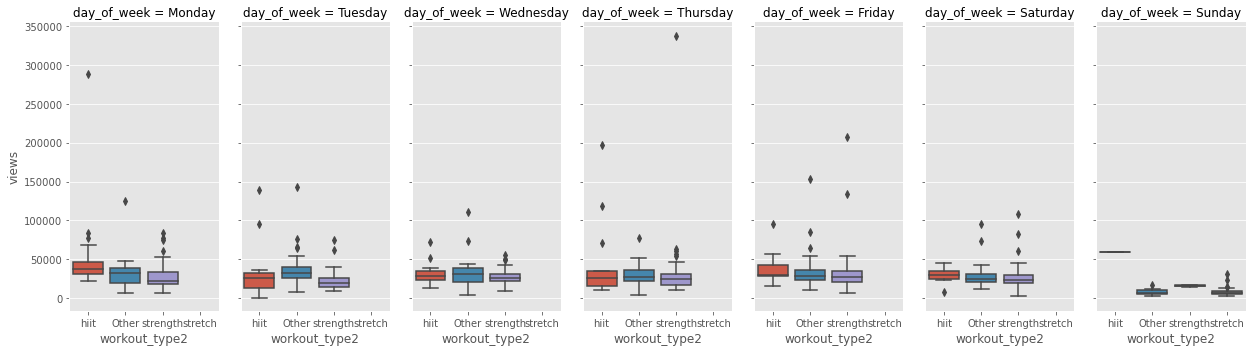

In [51]:
msk = df['views'] < 400000

sns.catplot(x='workout_type2', y='views',
           col='day_of_week',
           kind='box', data=df[msk], col_order=order,
           aspect=0.5)

We can notice things such as :

    - 'stretch' workouts are only posted on Sundays.
    
    - 'hiit' workouts seem to have more views on Mondays.

## Heatmap ; Numerical and Categorical Variables

A 'heat map' is a data visualization technique that shows the magnitude of a phenomenon as color in two dimensions.

The variation in color may by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

For exmpale, the below heatmap has _area_ and _workout_type_ categories as the axes; the color scale represents views in each cell.

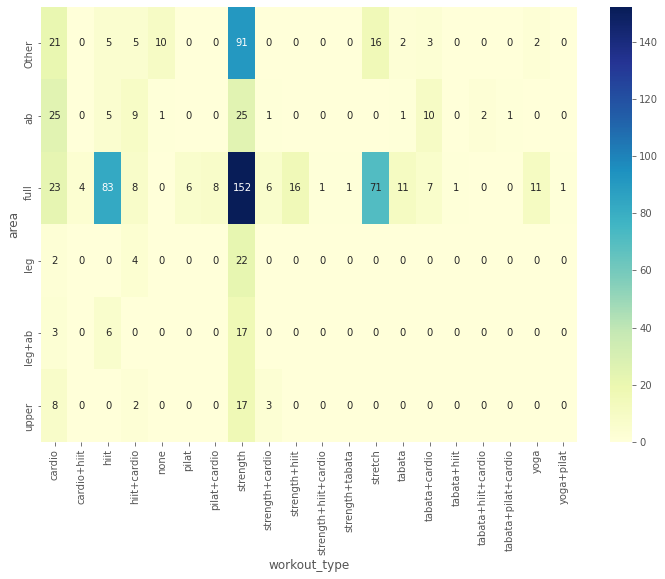

In [52]:
df_area_workout = df.groupby(['area', 'workout_type'])['views'].count().reset_index()
df_area_workout_pivot = df_area_workout.pivot(index='area', columns='workout_type', values='views').fillna(0)
sns.heatmap(df_area_workout_pivot, annot=True, fmt='.0f', cmap="YlGnBu")

## (Advanced) Relationship Test and Scatterplot; Numerical and Categorical Variables

How do we automatically discover the relationships among multiple variables?

Let's take the most critical features below and see how we could find interesting relationships.

In [53]:
# group of critical features selected
cols = ['length', 'views', 'calories', 'days_since_posted', 'area', 'workout_type', 'day_of_week']
df_test = df[cols]
df_test.head()

,length,views,calories,days_since_posted,area,workout_type,day_of_week
0,31.0,197591,500.0,711.0,full,hiit,Thursday
1,31.0,75863,NaN,706.0,full,tabata+hiit,Tuesday
2,32.0,60328,350.0,704.0,ab,strength,Thursday
3,31.0,59741,430.0,701.0,full,hiit,Sunday
4,31.0,18515,285.0,700.0,full,strength,Monday


In [56]:
numeric_columns = set(df_test.select_dtypes(include=['number']).columns)
non_numeric_columns = set(df_test.columns) - numeric_columns
print(numeric_columns)
print(non_numeric_columns)

{'days_since_posted', 'calories', 'length', 'views'}
{'day_of_week', 'area', 'workout_type'}


We have 4 numerical variables and 3 categorical variables.

There could be many complicated relationships among them!

In this section, we use the same method to test for relationships(including multicollinearity)

At a high level, we use ' K-fold cross-validation  ' to achieve this.

First ,we transform the categorical variables. Since we will be using 5-fold cross-validation, we need to make sure there are at least 5 observations for each category level.

In [57]:
for c in non_numeric_columns:
    cnt = df_test[c].value_counts()
    small_cnts = list(cnt[cnt <5].index)
    
    s_replace = {}
    for sm in small_cnts:
        s_replace[sm] = 'other'
        
    df_test[c] = df_test[c].replace(s_replace)
    df_test[c] = df_test[c].fillna('other')

Next, we loop through each variable and fit a model to predict it using the other variables.
We use a simple model of 'Gradient Boosting Model' and 'K-fold validation'.

Depending on whether the target variable is numerical or categorical, we apply different models and socres

When the target is numerical, we use the 'Gradient Boosting REgressor' model and 'Root Mean Squared Error' ; when the target is categorical , we use the 'Gradient Boosting Classifier' model and 'Accuracy'

For each target, we print out the 'K-fold validation score ( average of the scores ) ' and the most important 5 predictors.

We also add three features _rand0, rand1, rand2_ composed of random numbers. They serve as anchors when comparing the relationship between variables.

If one predictor is less important or similar compared to these random variables, then it is not an important predictor of the target variable.

In [59]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# we are going to look at feature importances so we like putting random features to act as a benchmark.
df_test['rand0'] = np.random.rand(df_test.shape[0])
df_test['rand1'] = np.random.rand(df_test.shape[0])
df_test['rand2'] = np.random.rand(df_test.shape[0])

# testing for relationships.
# for numeric targets.
reg = GradientBoostingRegressor(n_estimators=100, max_depth=5,
                                learning_rate=0.1, loss='ls',
                                random_state=1)
# for categorical targets.
clf = GradientBoostingClassifier(n_estimators=100, max_depth=5,
                                learning_rate=0.1, loss='deviance',
                                random_state=1)

df_test['calories'] = df_test['calories'].fillna(0) # only calories should have missing values.
        
# try to predict one feature using the rest of others to test collinearity, so it's easier to interpret the results
for c in cols:
    # c is the thing to predict.
    
    if c not in ['rand0', 'rand1', 'rand2']: 

        X = df_test.drop([c], axis=1) # drop the thing to predict.
        X = pd.get_dummies(X)
        y = df_test[c]

        print(c)

        if c in non_numeric_columns:
            scoring = 'accuracy'
            model = clf
            scores = cross_val_score(clf, X, y, cv=5, scoring=scoring)
            print(scoring + ": %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        elif c in numeric_columns:
            scoring = 'neg_root_mean_squared_error'
            model = reg
            scores = cross_val_score(reg, X, y, cv=5, scoring=scoring)
            print(scoring.replace('neg_', '') + ": %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))
        else:
            print('what is this?')

        model.fit(X, y)
        df_importances = pd.DataFrame(data={'feature_name': X.columns, 'importance': model.feature_importances_}).sort_values(by='importance', ascending=False)
        top5_features = df_importances.iloc[:5]
        print('top 5 features:')
        print(top5_features)

        print()

length
root_mean_squared_error: 5.73 (+/- 2.19)
top 5 features:
        feature_name  importance
1           calories    0.801975
0              views    0.069674
2  days_since_posted    0.047688
4              rand1    0.014483
5              rand2    0.011721

views
root_mean_squared_error: 46910.60 (+/- 77572.49)
top 5 features:
        feature_name  importance
3              rand0    0.277506
2  days_since_posted    0.157004
5              rand2    0.135895
0             length    0.091509
4              rand1    0.089266

calories
root_mean_squared_error: 74.40 (+/- 44.82)
top 5 features:
          feature_name  importance
0               length    0.860686
1                views    0.045982
2    days_since_posted    0.028806
29  day_of_week_Sunday    0.015778
3                rand0    0.015091

days_since_posted
root_mean_squared_error: 193.26 (+/- 122.23)
top 5 features:
  feature_name  importance
1        views    0.300327
0       length    0.238643
2     calories    0.167088
3

From the results above, we can look into each of the target variables and their relationship with the predictors.

Again, the step-by-step procedure of this test can be found in the Test for Multicollinearity section in 'https://www.justintodata.com/get-more-youtube-views-with-machine-learning/#step-3-engineering-the-features'

We can see that there is a strong relationship between length and calories.

Let's use a scatter plot to visualize them; the x-axis as length and the y-axis as calories, while the size of the dots represents the views

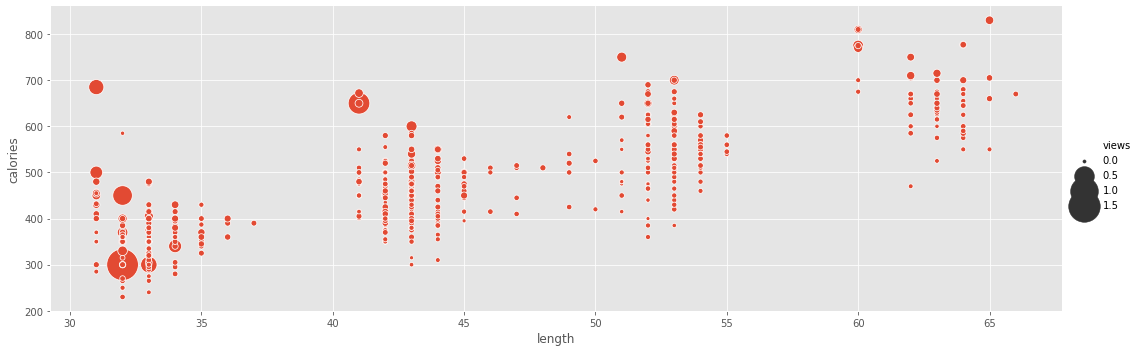

In [61]:
# length, cal

sns.relplot(x='length', y= 'calories', size='views', sizes=(10, 1000), data=df, aspect=3.0)

We can see that the longer the video, the more calories are burned, which is intuitive. We can also see that the videos with more views tend to have a shorter length.